In [ ]:
import pyaudio

p = pyaudio.PyAudio()

In [ ]:
https://github.com/python-acoustics/python-acoustics

In [ ]:
# Convert it to wav format (16 bits)
wav_wave = np.array(wave, dtype=np.int16)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [32]:
rate = 16000
duration = 0.5
t = np.linspace(0, duration, int(rate * duration))

In [33]:
def synth(f):
    x = np.sin(f * 2. * np.pi * t)
    display(Audio(x, rate=rate, autoplay=False))

In [34]:
synth(440)

In [35]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 440 * 2**(np.arange(3, 3 + len(notes)) / 12)
notes = list(zip(notes, freqs))
print(notes)

[('C', 523.2511306011972), ('C#', 554.3652619537442), ('D', 587.3295358348151), ('D#', 622.2539674441618), ('E', 659.2551138257398), ('F', 698.4564628660078), ('F#', 739.9888454232688), ('G', 783.9908719634985), ('G#', 830.6093951598903), ('A', 880.0), ('A#', 932.3275230361799), ('B', 987.7666025122483), ('C', 1046.5022612023945)]


In [36]:
for note, f in notes:
    
    print(note)
    synth(f)

C


C#


D


D#


E


F


F#


G


G#


A


A#


B


C


In [37]:
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.2 MB/s eta 0:00:008.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 3.4 MB/s eta 0:00:003.1 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=374d6e868cb3be3421926acb5e6f147a7e0b3099fe2b2d8761e0f21b9a103e4f
  Stored in directory: /home/carl69/.cache/pip/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio

import librosa
import librosa.display

In [2]:
# Load an example clip with harmonics and percussives
y, sr = librosa.load(librosa.ex('fishin'), duration=5, offset=10)

Audio(data=y, rate=sr)

In [3]:
# Compute the short-time Fourier transform of y
D = librosa.stft(y)

In [4]:
# Decompose D into harmonic and percussive components
D_harmonic, D_percussive = librosa.decompose.hpss(D)

# The default HPSS above assigns energy to each time-frequency bin according to 
# whether a horizontal (harmonic) or vertical (percussive) filter responds higher at that position.

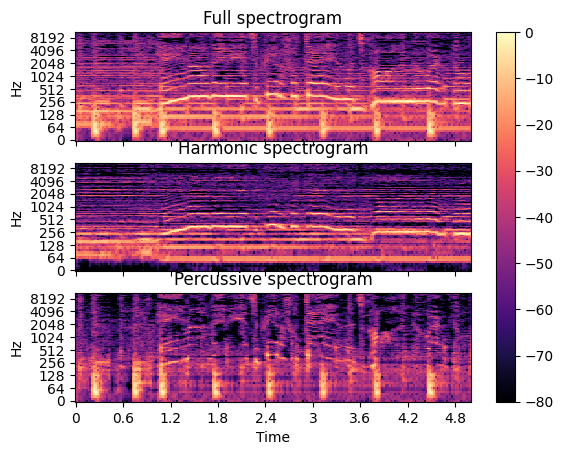

In [5]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive spectrogram')
fig.colorbar(img, ax=ax)

In [6]:
y_harmonic = librosa.istft(D_harmonic, length=len(y))
Audio(data=y_harmonic, rate=sr)

In [7]:
y_percussive = librosa.istft(D_percussive, length=len(y))
Audio(data=y_percussive, rate=sr)

With librosa it's also possible to do [Vocal Separation](https://librosa.org/doc/latest/auto_examples/plot_vocal_separation.html#sphx-glr-auto-examples-plot-vocal-separation-py)